The Goal of this notebook is to predict the smoker status of an individual through
the different parameters that are given. 
This is a classical binary classficiation task.

In [1]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("./playground-series/train.csv")
test_data = pd.read_csv('./playground-series/test.csv')

In [3]:
df.head()

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,0,55,165,60,81.0,0.5,0.6,1,1,135,...,40,75,16.5,1,1.0,22,25,27,0,1
1,1,70,165,65,89.0,0.6,0.7,2,2,146,...,57,126,16.2,1,1.1,27,23,37,1,0
2,2,20,170,75,81.0,0.4,0.5,1,1,118,...,45,93,17.4,1,0.8,27,31,53,0,1
3,3,35,180,95,105.0,1.5,1.2,1,1,131,...,38,102,15.9,1,1.0,20,27,30,1,0
4,4,30,165,60,80.5,1.5,1.0,1,1,121,...,44,93,15.4,1,0.8,19,13,17,0,1


In [4]:
df = pd.get_dummies(df, columns=['hearing(left)', 'hearing(right)', 'Urine protein', 'dental caries'], dtype=int)

In [5]:
train_y = df.smoking
train_x = df.drop(columns=["smoking", "id"])
train_x, dev_x, train_y, dev_y = train_test_split(train_x, train_y, test_size=0.05, random_state=42)


In [6]:
xgb = XGBClassifier(n_estimators=2048, learning_rate=0.05, max_depth=9, min_child_weight=1, 
                    subsample=0.75, colsample_bytree=0.8, objective='binary:logistic', 
                    random_state=42)

xgb.fit(train_x, train_y, eval_set=[(dev_x, dev_y)], early_stopping_rounds=256, verbose=True)

/Users/user/mambaforge/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/user/mambaforge/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/user/mambaforge/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/Users/user/mambaforge/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical

[0]	validation_0-logloss:0.67753
[1]	validation_0-logloss:0.66329
[2]	validation_0-logloss:0.64864
[3]	validation_0-logloss:0.63516
[4]	validation_0-logloss:0.62404
[5]	validation_0-logloss:0.61439
[6]	validation_0-logloss:0.60385
[7]	validation_0-logloss:0.59418
[8]	validation_0-logloss:0.58509
[9]	validation_0-logloss:0.57678
[10]	validation_0-logloss:0.56883
[11]	validation_0-logloss:0.56141
[12]	validation_0-logloss:0.55455
[13]	validation_0-logloss:0.54822
[14]	validation_0-logloss:0.54237
[15]	validation_0-logloss:0.53747
[16]	validation_0-logloss:0.53243
[17]	validation_0-logloss:0.52786
[18]	validation_0-logloss:0.52365
[19]	validation_0-logloss:0.51962
[20]	validation_0-logloss:0.51607
[21]	validation_0-logloss:0.51268
[22]	validation_0-logloss:0.50963
[23]	validation_0-logloss:0.50643
[24]	validation_0-logloss:0.50325
[25]	validation_0-logloss:0.50024
[26]	validation_0-logloss:0.49772
[27]	validation_0-logloss:0.49533
[28]	validation_0-logloss:0.49316
[29]	validation_0-loglos

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=2048, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

/Users/user/mambaforge/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/user/mambaforge/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/Users/user/mambaforge/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/Users/user/mambaforge/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_

AUC: 0.8631896958640574


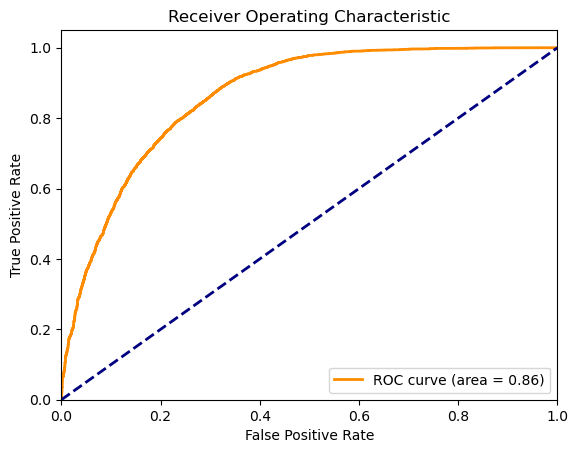

In [7]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

def plot_roc_curve(model, x_test, y_test):
    # Predict probabilities
    test_probabilities = model.predict_proba(x_test)[:, 1]

    # Compute ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, test_probabilities)

    # Calculate AUC
    auc = roc_auc_score(y_test, test_probabilities)
    print(f"AUC: {auc}")

    # Plot ROC Curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

# Use the function
plot_roc_curve(xgb, dev_x, dev_y)
